In [1]:
import torchvision
from torchvision.io import read_image
import os
from PIL import Image, ImageFilter
import numpy as np
import cv2 as cv
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt

In [2]:
from src.automated_detection import *

In [3]:
path='z://FKF//Data//'
name='240314_Cu100039.sxm_processed_raw.png'
file=os.path.join(path,name)

In [4]:
img=read_image(file)
img = torchvision.transforms.ToPILImage()(img)
image = img.convert("RGB")

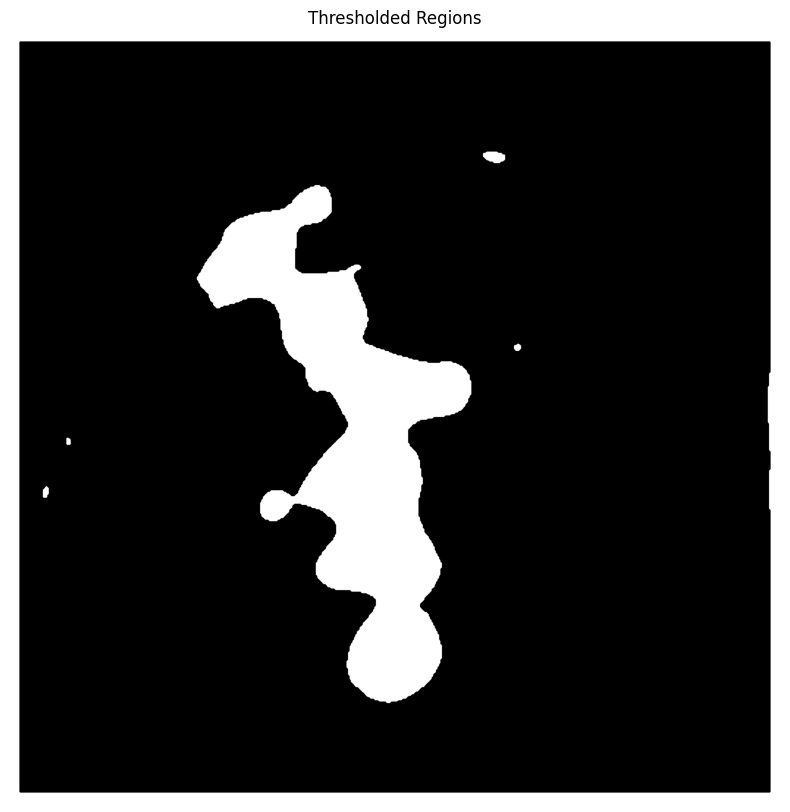

In [5]:
# Load and preprocess image
img = cv.imread(file, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

# Focus only on maximum heights (brightest regions)
threshold_value = 170  # Fixed the typo
_, binary = cv.threshold(img, threshold_value, 255, cv.THRESH_BINARY)

# Clean up the binary image
binary = cv.medianBlur(binary, 5)
binary = cv.morphologyEx(binary, cv.MORPH_OPEN, np.ones((3,3), np.uint8))

# Display with matplotlib instead of OpenCV window
plt.figure(figsize=(10, 10))
plt.imshow(binary, cmap='gray')
plt.title('Thresholded Regions')
plt.axis('off')  # Remove axis ticks and labels
plt.show()


Found 410 maximum height regions
Circle at (1212, 1970) with radius 163, intensity 215
Circle at (1238, 1978) with radius 142, intensity 215
Circle at (1206, 1960) with radius 174, intensity 215
Circle at (1206, 1970) with radius 168, intensity 215
Circle at (1212, 1964) with radius 167, intensity 215
Skipping circle at (1214, 1966) - intensity 0
Circle at (1222, 1968) with radius 158, intensity 215
Circle at (1210, 1974) with radius 165, intensity 215
Skipping circle at (1218, 1968) - intensity 0
Circle at (1224, 1988) with radius 155, intensity 215
Skipping circle at (1212, 1972) - intensity 0
Circle at (1224, 1974) with radius 152, intensity 215
Skipping circle at (1208, 1972) - intensity 0
Skipping circle at (1216, 1970) - intensity 0
Circle at (1216, 1972) with radius 158, intensity 215
Skipping circle at (1220, 1974) - intensity 0
Circle at (1232, 1974) with radius 148, intensity 215
Skipping circle at (1222, 1974) - intensity 0
Circle at (1236, 1982) with radius 144, intensity 2

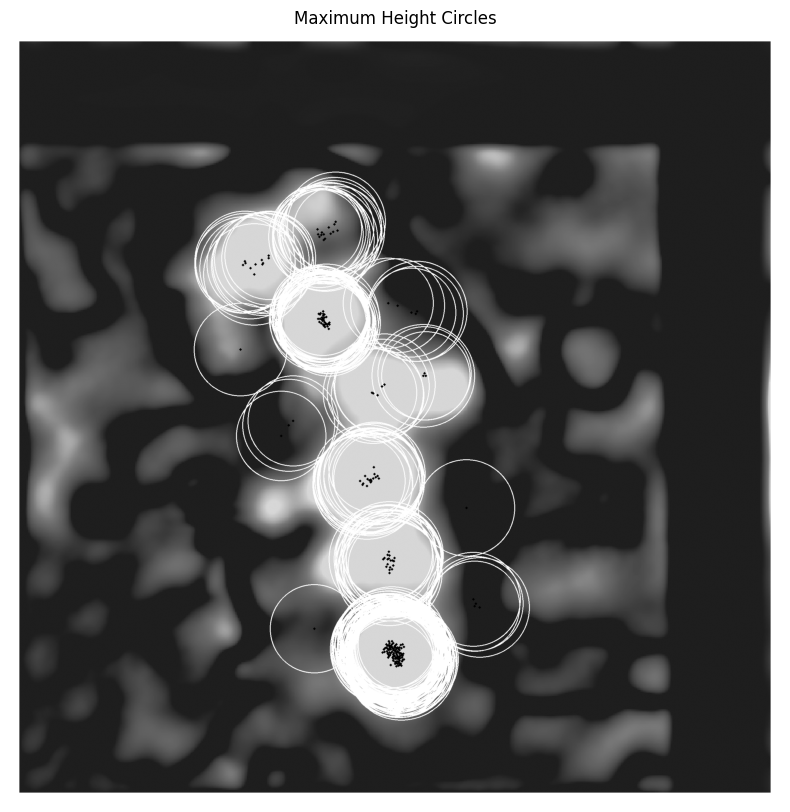

In [6]:
# Convert original image for visualization
# img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)

# Detect circles only in the high-intensity regions
# Detect circles only in the high-intensity regions
circles = cv.HoughCircles(binary, cv.HOUGH_GRADIENT, 1, 2,
                         param1=100,    
                         param2=5,    # Lower since we pre-filtered
                         minRadius=140,  # Start smaller to see what's detected
                         maxRadius=175)
if circles is not None:
    circles = np.uint16(np.around(circles))
    print(f"Found {len(circles[0])} maximum height regions")
   
    valid_circles = []
    for i in circles[0,:]:
        # Check bounds first
        if 0 <= i[1] < img.shape[0] and 0 <= i[0] < img.shape[1]:
            center_intensity = img[i[1], i[0]]
            
            # Only process circles with intensity > 0
            if center_intensity > 0:
                cv.circle(img, (i[0], i[1]), i[2], (255, 192, 203), 2)  # Pink circle outline
                cv.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)
                print(f"Circle at ({i[0]}, {i[1]}) with radius {i[2]}, intensity {center_intensity}")
                valid_circles.append(i)
            else:
                print(f"Skipping circle at ({i[0]}, {i[1]}) - intensity 0")
    
    print(f"Valid circles (intensity > 0): {len(valid_circles)}")

# Convert original image for visualization
# img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)

# Detect circles only in the high-intensity regions
# Detect circles only in the high-intensity regions
circles = cv.HoughCircles(binary, cv.HOUGH_GRADIENT, 1, 2,
                         param1=80,    
                         param2=5,    # Lower since we pre-filtered
                         minRadius=140,  # Start smaller to see what's detected
                         maxRadius=175)
if circles is not None:
    circles = np.uint16(np.around(circles))
    print(f"Found {len(circles[0])} maximum height regions")
   
    valid_circles = []
    for i in circles[0,:]:
        # Check bounds first
        if 0 <= i[1] < img.shape[0] and 0 <= i[0] < img.shape[1]:
            center_intensity = img[i[1], i[0]]
            
            # Only process circles with intensity > 0
            if center_intensity > 0:
                cv.circle(img, (i[0], i[1]), i[2], (255, 192, 203), 2)  # Pink circle outline
                cv.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)
                # print(f"Circle at ({i[0]}, {i[1]}) with radius {i[2]}, intensity {center_intensity}")
                valid_circles.append(i)
            else:
                 """#print(f"Skipping circle at ({i[0]}, {i[1]}) - intensity 0")"""
                 continue
# Display with matplotlib instead of OpenCV window
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')  # Use 'gray' colormap for grayscale images
plt.title('Maximum Height Circles')
plt.axis('off')  # Remove axis ticks and labels
plt.show()

In [7]:
circles

array([[[1212, 1970,  163],
        [1238, 1978,  142],
        [1206, 1960,  174],
        ...,
        [1046,  634,  142],
        [1196, 1680,  156],
        [ 972, 1906,  141]]], shape=(1, 410, 3), dtype=uint16)

In [8]:
# Step 1: Make sure you have the cluster analysis results
# (Run this if you haven't already)

from sklearn.cluster import DBSCAN
cluster_info, labels = analyze_circle_clusters(circles, eps=60, min_samples=5)

# # Step 2: Create the ordered cluster visualization
# combined_img, cluster_img, legend_img = display_clusters_with_legend(img, circles, cluster_info, labels)

# # Step 3: Display the results
# # Option A: Show everything side by side
# plt.figure(figsize=(15, 8))
# plt.imshow(cv.cvtColor(combined_img, cv.COLOR_BGR2RGB))  # Convert BGR to RGB
# plt.title('Clusters with Legend')
# plt.axis('off')
# plt.show()

Estimated number of clusters: 8
Estimated number of noise points: 15
Cluster cluster_0: 251 circles, centroid at (1228.0, 1984.5), density: 0.0461
Cluster cluster_1: 57 circles, centroid at (1001.2, 921.5), density: 0.0283
Cluster cluster_2: 13 circles, centroid at (788.2, 737.8), density: 0.0025
Cluster cluster_3: 23 circles, centroid at (1149.0, 1430.3), density: 0.0064
Cluster cluster_4: 24 circles, centroid at (1212.7, 1695.2), density: 0.0095
Cluster cluster_5: 17 circles, centroid at (1009.5, 639.1), density: 0.0046
Cluster cluster_6: 5 circles, centroid at (1174.8, 1144.8), density: 0.0037
Cluster cluster_7: 5 circles, centroid at (1228.4, 874.8), density: 0.0022


In [9]:
cluster_info.keys()

dict_keys(['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5', 'cluster_6', 'cluster_7'])

Drawing centroids for 8 clusters
cluster_0: centroid at (1228, 1984), 251 circles
cluster_1: centroid at (1001, 921), 57 circles
cluster_2: centroid at (788, 737), 13 circles
cluster_3: centroid at (1149, 1430), 23 circles
cluster_4: centroid at (1212, 1695), 24 circles
cluster_5: centroid at (1009, 639), 17 circles
cluster_6: centroid at (1174, 1144), 5 circles
cluster_7: centroid at (1228, 874), 5 circles


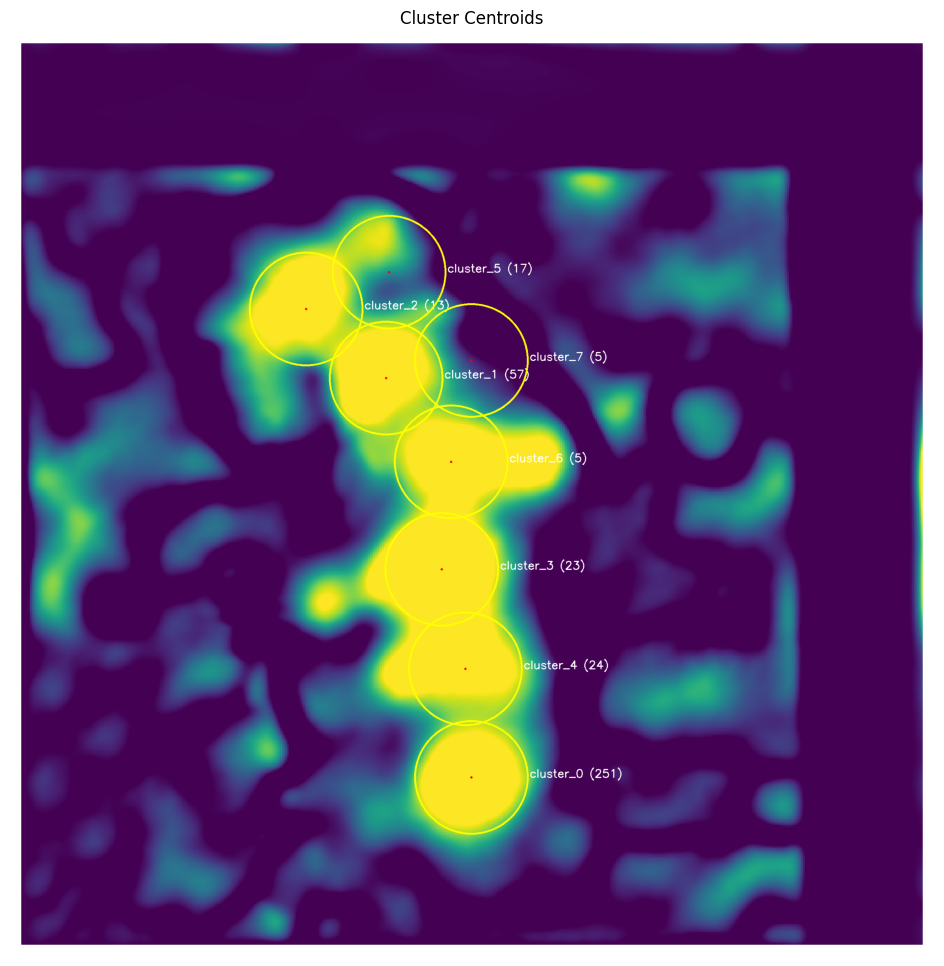

In [10]:
# cluster_info, labels = analyze_circle_clusters(circles)
img_with_centroids = show_centroid_visualization(image, cluster_info,radius=150)

In [11]:
to_remove=['cluster_7','cluster_5']

In [12]:
for key in to_remove:
    if key in cluster_info:
        del cluster_info[key]


In [13]:
import numpy as np
import cv2 as cv
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

def connect_centroids_chain(img, cluster_info, segment_length=50, chain_color=(255, 0, 0), thickness=2):
    """
    Connect cluster centroids using a freely jointed chain model
    
    Args:
        img: PIL Image in RGB format
        cluster_info: Dictionary from analyze_circle_clusters function
        segment_length: Length of each chain segment (pixels)
        chain_color: Color for chain connections (default: red (255, 0, 0))
        thickness: Line thickness for chain segments
    
    Returns:
        img_with_chain: Image with centroids connected by chain
    """
    
    # Convert PIL Image to OpenCV format
    img_cv = cv.cvtColor(np.array(img), cv.COLOR_RGB2BGR)
    img_with_chain = img_cv.copy()
    
    if cluster_info is None or len(cluster_info) < 2:
        print("Need at least 2 clusters to create a chain")
        return img_with_chain
    
    # Extract centroids
    centroids = []
    cluster_names = []
    for cluster_name, cluster_data in cluster_info.items():
        centroids.append(cluster_data['centroid'])
        cluster_names.append(cluster_name)
    
    centroids = np.array(centroids)
    print(f"Connecting {len(centroids)} centroids with chain segments")
    
    # Find optimal chain path (minimum spanning tree or nearest neighbor)
    chain_path = find_chain_path(centroids)
    
    # Draw the freely jointed chain
    for i in range(len(chain_path) - 1):
        start_idx = chain_path[i]
        end_idx = chain_path[i + 1]
        
        start_point = centroids[start_idx]
        end_point = centroids[end_idx]
        
        # Create chain segments between these two points
        chain_segments = create_chain_segments(start_point, end_point, segment_length)
        
        # Draw each segment
        for j in range(len(chain_segments) - 1):
            pt1 = (int(chain_segments[j][0]), int(chain_segments[j][1]))
            pt2 = (int(chain_segments[j + 1][0]), int(chain_segments[j + 1][1]))
            cv.line(img_with_chain, pt1, pt2, chain_color, thickness)
    
    # Draw centroids on top
    for i, centroid in enumerate(centroids):
        cx, cy = int(centroid[0]), int(centroid[1])
        cv.circle(img_with_chain, (cx, cy), 20, (0, 255, 255), 2)  # Yellow circles
        cv.circle(img_with_chain, (cx, cy), 3, (0, 0, 255), -1)   # Red center
        cv.putText(img_with_chain, cluster_names[i], 
                   (cx + 25, cy), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
    
    return img_with_chain

def find_chain_path(centroids):
    """
    Find the optimal path to connect centroids (using nearest neighbor heuristic)
    
    Args:
        centroids: Array of centroid coordinates
    
    Returns:
        path: List of indices representing the connection order
    """
    n = len(centroids)
    if n <= 1:
        return list(range(n))
    
    # Start from the first centroid
    path = [0]
    remaining = set(range(1, n))
    
    current = 0
    
    while remaining:
        # Find nearest unvisited centroid
        min_dist = float('inf')
        next_centroid = None
        
        for candidate in remaining:
            dist = np.linalg.norm(centroids[current] - centroids[candidate])
            if dist < min_dist:
                min_dist = dist
                next_centroid = candidate
        
        path.append(next_centroid)
        remaining.remove(next_centroid)
        current = next_centroid
    
    return path

def create_chain_segments(start_point, end_point, segment_length):
    """
    Create freely jointed chain segments between two points
    
    Args:
        start_point: Starting coordinate [x, y]
        end_point: Ending coordinate [x, y]
        segment_length: Length of each chain segment
    
    Returns:
        segments: Array of points along the chain
    """
    start = np.array(start_point)
    end = np.array(end_point)
    
    # Calculate total distance
    total_distance = np.linalg.norm(end - start)
    
    # Calculate number of segments needed
    num_segments = max(1, int(total_distance / segment_length))
    
    # Create segments with some randomness (freely jointed)
    segments = [start]
    
    for i in range(num_segments):
        # Progress along the direct path
        progress = (i + 1) / num_segments
        direct_point = start + progress * (end - start)
        
        # Add some random deviation (freely jointed characteristic)
        max_deviation = segment_length * 0.3  # 30% of segment length
        random_offset = np.random.normal(0, max_deviation/3, 2)
        
        # Don't deviate too much from the direct path
        deviation_factor = 1 - abs(progress - 0.5) * 2  # More deviation in middle
        random_offset *= deviation_factor
        
        segment_point = direct_point + random_offset
        segments.append(segment_point)
    
    # Ensure the last point is exactly the end point
    segments[-1] = end
    
    return np.array(segments)

def visualize_chain_connection(img, cluster_info, segment_length=50):
    """
    Complete function to create and display chain connection
    """
    # Create the chain visualization
    img_with_chain = connect_centroids_chain(img, cluster_info, segment_length)
    
    # Show the result
    resized_chain = cv.resize(img_with_chain, (800, 800))
    cv.imshow('Freely Jointed Chain Connection', resized_chain)
    cv.waitKey(0)
    cv.destroyAllWindows()
    
    # Also show with matplotlib
    plt.figure(figsize=(12, 12))
    img_rgb = cv.cvtColor(img_with_chain, cv.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title('Centroids Connected by Freely Jointed Chain')
    plt.axis('off')
    plt.show()
    
    return img_with_chain

In [14]:
def get_chain_line_array(cluster_info, segment_length=50):
    """
    Create and return the chain line as an array of points
    
    Args:
        cluster_info: Dictionary from analyze_circle_clusters function
        segment_length: Length of each chain segment (pixels)
    
    Returns:
        chain_line_array: Array of all points forming the chain line
    """
    
    if cluster_info is None or len(cluster_info) < 2:
        print("Need at least 2 clusters to create a chain")
        return None
    
    # Extract centroids
    centroids = []
    cluster_names = []
    for cluster_name, cluster_data in cluster_info.items():
        centroids.append(cluster_data['centroid'])
        cluster_names.append(cluster_name)
    
    centroids = np.array(centroids)
    print(f"Creating chain line from {len(centroids)} centroids")
    
    # Find optimal chain path (same as in connect_centroids_chain)
    chain_path = find_chain_path(centroids)
    
    # Create the complete chain line as array of points
    chain_line_points = []
    
    # Add first centroid
    chain_line_points.append(centroids[chain_path[0]])
    
    # Create chain segments between consecutive centroids
    for i in range(len(chain_path) - 1):
        start_idx = chain_path[i]
        end_idx = chain_path[i + 1]
        
        start_point = centroids[start_idx]
        end_point = centroids[end_idx]
        
        # Create chain segments between these two points
        chain_segments = create_chain_segments(start_point, end_point, segment_length)
        
        # Add all intermediate points (skip first to avoid duplication)
        for point in chain_segments[1:]:
            chain_line_points.append(point)
    
    # Convert to numpy array
    chain_line_array = np.array(chain_line_points)
    
    print(f"Chain line saved with {len(chain_line_array)} points")
    return chain_line_array

def visualize_chain_connection_with_array(img, cluster_info, segment_length=50):
    """
    Complete function to create chain connection and return both image and line array
    """
    # Create the chain visualization
    img_with_chain = connect_centroids_chain(img, cluster_info, segment_length)
    
    # Get the chain line as array
    chain_line_array = get_chain_line_array(cluster_info, segment_length)
    
    # Show with matplotlib
    plt.figure(figsize=(12, 12))
    img_rgb = cv.cvtColor(img_with_chain, cv.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title('Centroids Connected by Freely Jointed Chain')
    plt.axis('off')
    plt.show()
    
    return img_with_chain, chain_line_array


Connecting 6 centroids with chain segments
Creating chain line from 6 centroids
Chain line saved with 281 points


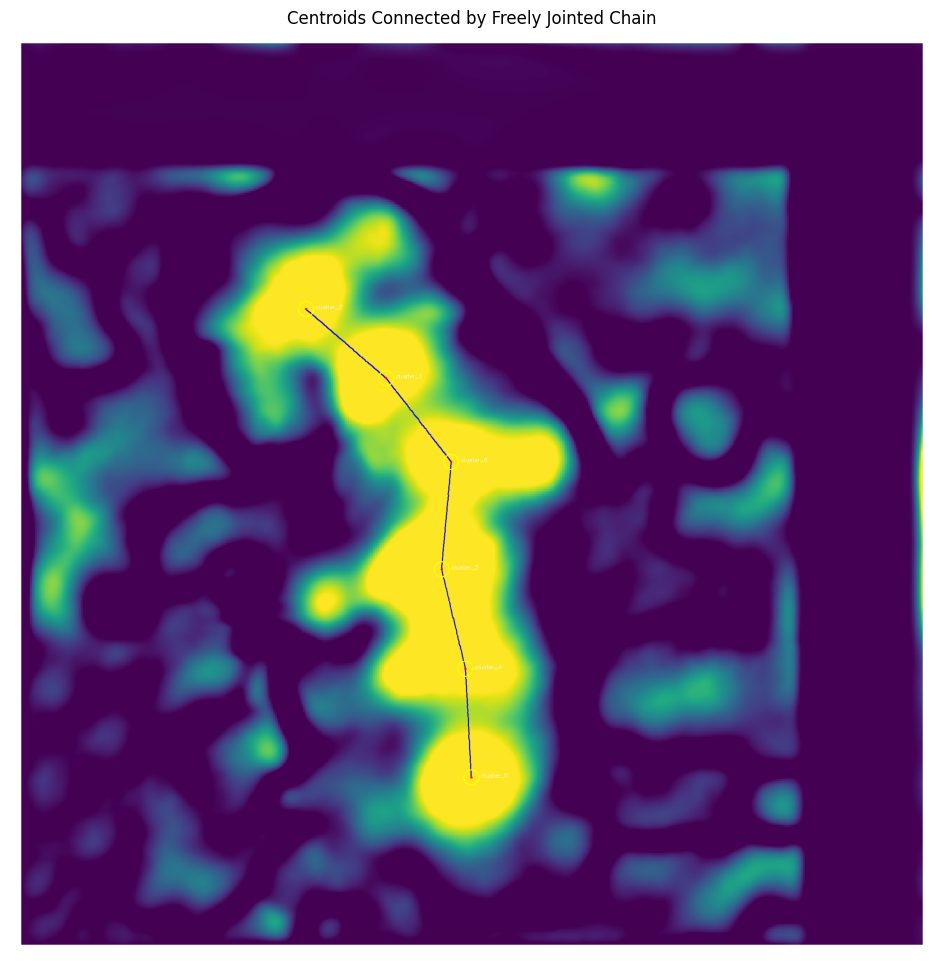

Chain line array shape: (281, 2)
First few points: [[1228.03187251 1984.5498008 ]
 [1227.78780956 1979.48997064]
 [1227.48967187 1974.48853952]
 [1227.23581106 1969.3506639 ]
 [1226.97323209 1964.18019079]]
Last few points: [[803.29915559 750.96614817]
 [799.61165812 747.6771115 ]
 [795.75454909 744.41722747]
 [791.94539675 741.1059535 ]
 [788.15384615 737.84615385]]


In [15]:
img_with_chain, chain_line_array = visualize_chain_connection_with_array(image, cluster_info, segment_length=5)

# Now you have:
# - img_with_chain: The visualization image
# - chain_line_array: Array of all points forming the chain line

print(f"Chain line array shape: {chain_line_array.shape}")
print(f"First few points: {chain_line_array[:5]}")
print(f"Last few points: {chain_line_array[-5:]}")

Blacked out cluster_0 at (1228, 1984)
Blacked out cluster_1 at (1001, 921)
Blacked out cluster_2 at (788, 737)
Blacked out cluster_3 at (1149, 1430)
Blacked out cluster_4 at (1212, 1695)
Blacked out cluster_6 at (1174, 1144)


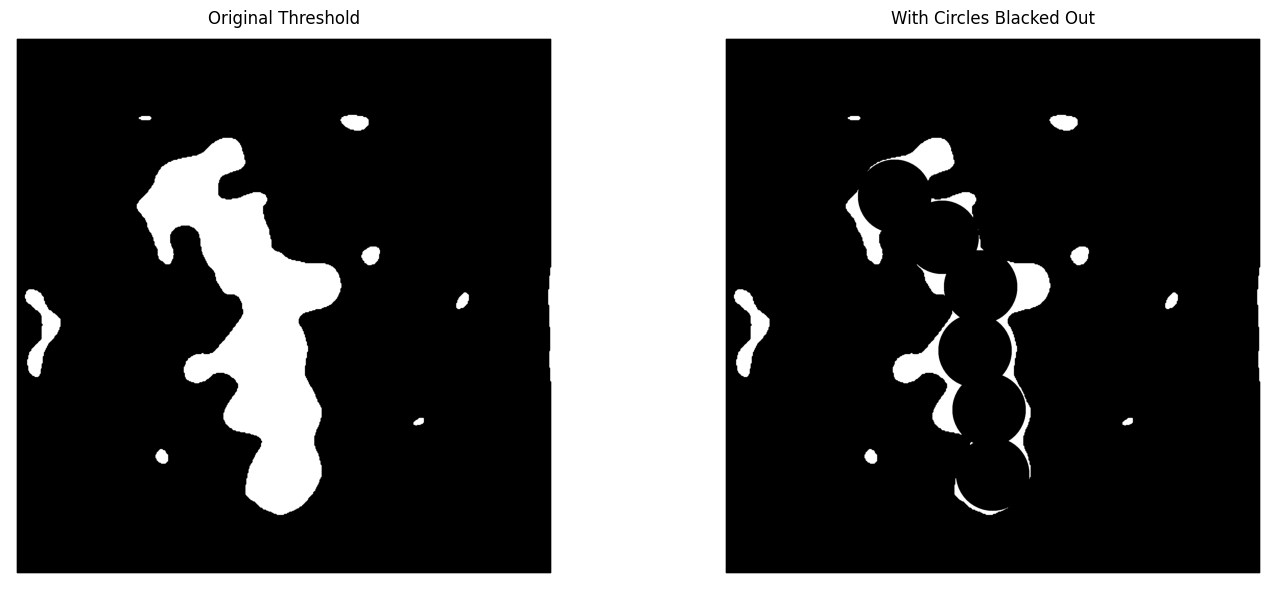

In [16]:
radius=165
# Your existing threshold code
img = cv.imread(file, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# Focus only on maximum heights (brightest regions)
threshold_value = 130  # Fixed the typo
_, binary = cv.threshold(img, threshold_value, 255, cv.THRESH_BINARY)
# Clean up the binary image
binary = cv.medianBlur(binary, 5)
binary = cv.morphologyEx(binary, cv.MORPH_OPEN, np.ones((3,3), np.uint8))

# Make a copy to modify
binary_modified = binary.copy()

# Color inside circles black using cluster_info
for cluster_name, cluster_data in cluster_info.items():
    centroid = cluster_data['centroid']
    cx, cy = int(centroid[0]), int(centroid[1])
    
    # Draw filled circle (black = 0 for grayscale)
    cv.circle(binary_modified, (cx, cy), radius, 0, -1)  # -1 means filled
    
    print(f"Blacked out {cluster_name} at ({cx}, {cy})")

# Display result
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.title('Original Threshold')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_modified, cmap='gray')
plt.title('With Circles Blacked Out')
plt.axis('off')

plt.tight_layout()
plt.show()

Found 234 potential mini circles
Skipping mini circle at (946, 1596) - not in threshold area (value: 0)
Mini circle at (852, 1518) with radius 73 - in threshold area
Mini circle at (1554, 374) with radius 69 - in threshold area
Skipping mini circle at (948, 1596) - not in threshold area (value: 0)
Mini circle at (840, 1516) with radius 62 - in threshold area
Mini circle at (852, 1516) with radius 72 - in threshold area
Skipping mini circle at (944, 1600) - not in threshold area (value: 0)
Mini circle at (1032, 1720) with radius 72 - in threshold area
Mini circle at (850, 1516) with radius 71 - in threshold area
Mini circle at (844, 1512) with radius 64 - in threshold area
Mini circle at (1022, 1720) with radius 64 - in threshold area
Skipping mini circle at (942, 1598) - not in threshold area (value: 0)
Mini circle at (846, 1508) with radius 63 - in threshold area
Mini circle at (852, 1508) with radius 63 - in threshold area
Skipping mini circle at (944, 1604) - not in threshold area (

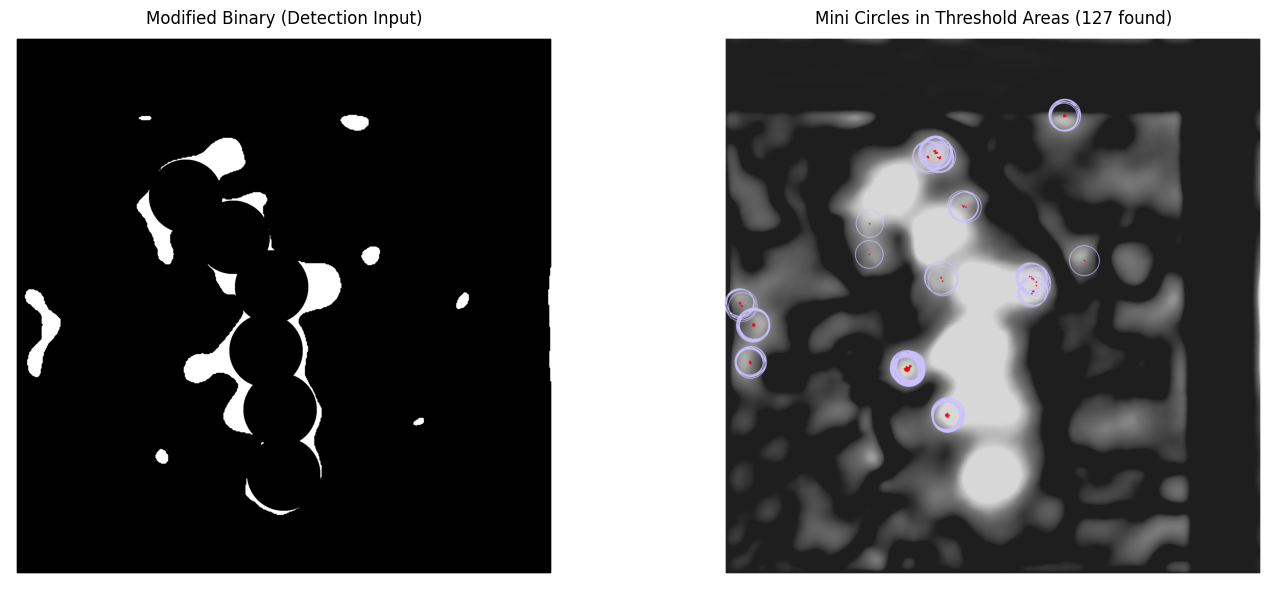

In [17]:
# Convert original image for visualization (prepare for drawing colored circles)
img_display = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
# Detect circles from the modified binary image (with blacked-out centroids)
mini_circles = cv.HoughCircles(binary_modified, cv.HOUGH_GRADIENT, 1, 2,
                         param1=80,    
                         param2=5,    # Lower since we pre-filtered
                         minRadius=60,  # Start smaller to see what's detected
                         maxRadius=75)
if mini_circles is not None:
    mini_circles = np.uint16(np.around(mini_circles))
    print(f"Found {len(mini_circles[0])} potential mini circles")
   
    valid_mini_circles = []
    for i in mini_circles[0,:]:
        # Check bounds first
        if 0 <= i[1] < binary_modified.shape[0] and 0 <= i[0] < binary_modified.shape[1]:
            # Check if circle center is in WHITE area of threshold image (255 = white)
            center_threshold_value = binary_modified[i[1], i[0]]
           
            # Only process circles whose centers are in thresholded (white) areas
            if center_threshold_value == 255:  # White pixel in binary image
                cv.circle(img_display, (i[0], i[1]), i[2], (255, 192, 203), 2)  # Pink circle outline
                cv.circle(img_display, (i[0], i[1]), 2, (0, 0, 255), 3)  # Red center dot
                print(f"Mini circle at ({i[0]}, {i[1]}) with radius {i[2]} - in threshold area")
                valid_mini_circles.append(i)
            else:
                print(f"Skipping mini circle at ({i[0]}, {i[1]}) - not in threshold area (value: {center_threshold_value})")
               
    print(f"Valid mini circles in threshold areas: {len(valid_mini_circles)}")
else:
    print("No mini circles detected")
    valid_mini_circles = []
# Display with matplotlib
plt.figure(figsize=(15, 6))
# Show the modified binary image used for detection
plt.subplot(1, 2, 1)
plt.imshow(binary_modified, cmap='gray')
plt.title('Modified Binary (Detection Input)')
plt.axis('off')
# Show the result with detected circles
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_display, cv.COLOR_BGR2RGB))
plt.title(f'Mini Circles in Threshold Areas ({len(valid_mini_circles)} found)')
plt.axis('off')
plt.tight_layout()
plt.show()

In [18]:
if valid_mini_circles:
    # Convert list to numpy array and add extra dimension to match mini_circles structure
    valid_mini_circles_array = np.array([valid_mini_circles], dtype=np.uint16)
else:
    valid_mini_circles_array = None

Estimated number of clusters: 10
Estimated number of noise points: 3
Cluster cluster_0: 40 circles, centroid at (846.6, 1511.2), density: 0.0595
Cluster cluster_1: 8 circles, centroid at (1551.0, 375.5), density: 0.1250
Cluster cluster_2: 17 circles, centroid at (1023.6, 1721.4), density: 0.0759
Cluster cluster_3: 6 circles, centroid at (96.3, 1220.7), density: 0.0312
Cluster cluster_4: 9 circles, centroid at (155.1, 1314.7), density: 0.1406
Cluster cluster_5: 12 circles, centroid at (1408.8, 1129.0), density: 0.0053
Cluster cluster_6: 18 circles, centroid at (968.9, 550.6), density: 0.0083
Cluster cluster_7: 7 circles, centroid at (139.7, 1482.3), density: 0.1167
Cluster cluster_8: 3 circles, centroid at (999.3, 1108.0), density: 0.0234
Cluster cluster_9: 4 circles, centroid at (1100.0, 783.0), density: 0.0476


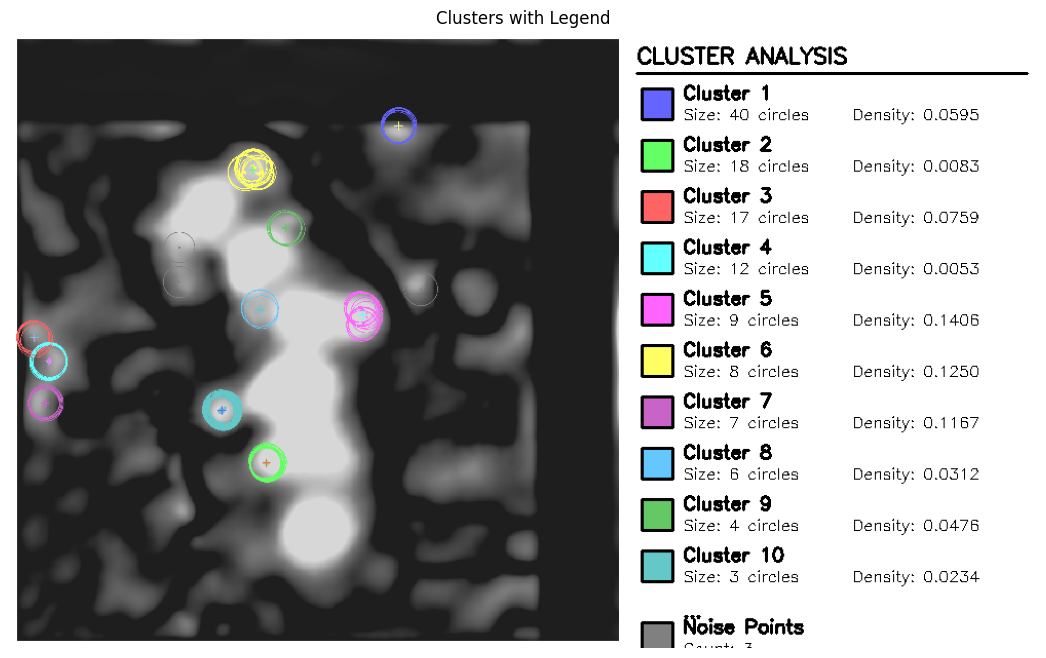

In [19]:
# Step 1: Make sure you have the cluster analysis results
# (Run this if you haven't already)
mini_cluster_info, labels_mini = analyze_circle_clusters(valid_mini_circles_array, eps=50, min_samples=3)

# Step 2: Create the ordered cluster visualization
combined_img, cluster_img, legend_img = display_clusters_with_legend(img, valid_mini_circles_array, mini_cluster_info, labels_mini)

# Step 3: Display the results
# Option A: Show everything side by side
plt.figure(figsize=(15, 8))
plt.imshow(cv.cvtColor(combined_img, cv.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.title('Clusters with Legend')
plt.axis('off')
plt.show()

In [24]:
def save_chain_line_as_array(cluster_info, segment_length=50):
    """
    Create and save the chain line as an array of points
    
    Args:
        cluster_info: Dictionary from analyze_circle_clusters function
        segment_length: Length of each chain segment (pixels)
    
    Returns:
        chain_line_array: Array of all points forming the chain line
    """
    
    if cluster_info is None or len(cluster_info) < 2:
        print("Need at least 2 clusters to create a chain")
        return None
    
    # Extract centroids
    centroids = []
    for cluster_name, cluster_data in cluster_info.items():
        centroids.append(cluster_data['centroid'])
    
    centroids = np.array(centroids)
    print(f"Creating chain line from {len(centroids)} centroids")
    
    # Find optimal chain path (same as in connect_centroids_chain)
    chain_path = find_chain_path(centroids)
    
    # Create the complete chain line as array of points
    chain_line_points = []
    
    # Add first centroid
    chain_line_points.append(centroids[chain_path[0]])
    
    # Create chain segments between consecutive centroids
    for i in range(len(chain_path) - 1):
        start_idx = chain_path[i]
        end_idx = chain_path[i + 1]
        
        start_point = centroids[start_idx]
        end_point = centroids[end_idx]
        
        # Create chain segments between these two points
        chain_segments = create_chain_segments(start_point, end_point, segment_length)
        
        # Add all intermediate points (skip first to avoid duplication)
        for point in chain_segments[1:]:
            chain_line_points.append(point)
    
    # Convert to numpy array
    chain_line_array = np.array(chain_line_points)
    
    print(f"Chain line saved with {len(chain_line_array)} points")
    return chain_line_array

def distance_point_to_chain_line(point, chain_line_array):
    """
    Calculate minimum distance from a point to the chain line
    
    Args:
        point: [x, y] coordinates
        chain_line_array: Array of points forming the chain line
    
    Returns:
        min_distance: Minimum distance to any point on the chain line
    """
    if chain_line_array is None or len(chain_line_array) < 2:
        return float('inf')
    
    min_distance = float('inf')
    
    # Check distance to each line segment in the chain
    for i in range(len(chain_line_array) - 1):
        dist = distance_point_to_line_segment(point, chain_line_array[i], chain_line_array[i+1])
        min_distance = min(min_distance, dist)
    
    return min_distance

def filter_clusters_by_chain_line(mini_circles_array, cluster_info, chain_line_array, max_distance):
    """
    Filter clusters based on their distance to the saved chain line
    
    Args:
        mini_circles_array: Array of mini circles
        cluster_info: Dictionary with cluster information
        chain_line_array: The saved chain line array
        max_distance: Maximum allowed distance from chain line
    
    Returns:
        filtered_circles: Array of circles within distance constraint
        filtered_cluster_info: Updated cluster information
    """
    if chain_line_array is None:
        print("No chain line provided")
        return mini_circles_array, cluster_info
    
    filtered_circles = []
    filtered_cluster_info = {}
    
    for cluster_name, cluster_data in cluster_info.items():
        centroid = cluster_data['centroid']
        
        # Calculate minimum distance to chain line
        min_distance = distance_point_to_chain_line(centroid, chain_line_array)
        
        # If cluster is within distance constraint, keep it
        if min_distance <= max_distance:
            print(f"{cluster_name}: distance {min_distance:.1f} <= {max_distance} ✓")
            filtered_cluster_info[cluster_name] = cluster_data
            
            # Add all circles from this cluster to filtered list
            for circle in cluster_data['centers']:
                filtered_circles.append(circle)
        else:
            print(f"{cluster_name}: distance {min_distance:.1f} > {max_distance} ✗ (filtered out)")
    
    # Convert back to array format
    if filtered_circles:
        filtered_circles_array = np.array([filtered_circles], dtype=np.uint16)
    else:
        filtered_circles_array = None
    
    return filtered_circles_array, filtered_cluster_info



In [27]:
def show_cluster_distances(mini_cluster_info, chain_line_array, max_distance):
    """
    Simple function to just show which clusters are over distance x
    """
    
    print(f"Clusters over {max_distance}px from chain line:")
    print("=" * 50)
    
    over_distance_clusters = []
    
    for cluster_name, cluster_data in mini_cluster_info.items():
        centroid = cluster_data['centroid']
        distance = distance_point_to_chain_line(centroid, chain_line_array)
        
        if distance > max_distance:
            over_distance_clusters.append(cluster_name)
            print(f"{cluster_name}: distance = {distance:.1f}px (OVER LIMIT)")
    
    if not over_distance_clusters:
        print("No clusters are over the distance limit!")
    else:
        print(f"\nTotal clusters over {max_distance}px: {len(over_distance_clusters)}")
        print(f"Cluster names: {over_distance_clusters}")
    
    return over_distance_clusters

def visualize_dual_cluster_centroids(img, cluster_info1, cluster_info2, radius1=150, radius2=75, 
                                    color1=(0, 255, 255), color2=(255, 0, 255), thickness=3):
    """
    Visualize centroids from two different dictionaries with different radii
    
    Args:
        img: Original image
        cluster_info1: First dictionary with centroids
        cluster_info2: Second dictionary with centroids
        radius1: Radius for first dictionary circles (default: 150)
        radius2: Radius for second dictionary circles (default: 75)
        color1: Color for first dictionary circles (default: yellow (0, 255, 255))
        color2: Color for second dictionary circles (default: magenta (255, 0, 255))
        thickness: Line thickness for circles (default: 3)
    
    Returns:
        img_with_centroids: Image with both sets of centroids drawn
    """
    
    # Create a copy for visualization
    img_cv = cv.cvtColor(np.array(img), cv.COLOR_RGB2BGR)
    img_centroids = img_cv.copy()
    if len(img_centroids.shape) == 2:  # If grayscale
        img_centroids = cv.cvtColor(img_centroids, cv.COLOR_GRAY2BGR)
    
    # Draw first dictionary centroids
    if cluster_info1 is not None:
        
        for cluster_name, cluster_data in cluster_info1.items():
            centroid = cluster_data['centroid']
            cx, cy = int(centroid[0]), int(centroid[1])
            cluster_size = cluster_data['size']
            
            # Draw the centroid circle
            cv.circle(img_centroids, (cx, cy), radius1, color1, thickness)
            
            # Add a small center dot
            cv.circle(img_centroids, (cx, cy), 3, (0, 0, 255), -1)  # Red filled dot
            
            # Add cluster label
            cv.putText(img_centroids, f"{cluster_name} ",
                       (cx + radius1 + 5, cy), cv.FONT_HERSHEY_SIMPLEX,
                       0.6, (255, 255, 255), 2)
            

    
    # Draw second dictionary centroids
    if cluster_info2 is not None:
        print(f"Drawing centroids for {len(cluster_info2)} clusters from second dictionary (radius: {radius2})")
        
        for cluster_name, cluster_data in cluster_info2.items():
            centroid = cluster_data['centroid']
            cx, cy = int(centroid[0]), int(centroid[1])
            cluster_size = cluster_data['size']
            
            # Draw the centroid circle
            cv.circle(img_centroids, (cx, cy), radius2, color2, thickness)
            
            # Add a small center dot
            cv.circle(img_centroids, (cx, cy), 3, (0, 255, 0), -1)  # Green filled dot
            
            # Add cluster label (offset to avoid overlap)
            cv.putText(img_centroids,f"{cluster_name}",
                       (cx + radius2 + 5, cy + 15), cv.FONT_HERSHEY_SIMPLEX,
                       0.6, (255, 255, 255), 2)
            
    
    return img_centroids

def show_dual_centroid_visualization(img, cluster_info1, cluster_info2, radius1=150, radius2=75):
    """
    Complete function to create and display dual centroid visualization
    
    Args:
        img: Original image
        cluster_info1: First dictionary (e.g., big circles)
        cluster_info2: Second dictionary (e.g., mini circles)
        radius1: Radius for first dictionary
        radius2: Radius for second dictionary
    """
    # Create the visualization
    img_with_centroids = visualize_dual_cluster_centroids(
        img, cluster_info1, cluster_info2, radius1, radius2
    )
    
    # Show the result with matplotlib
    plt.figure(figsize=(15, 12))
    plt.imshow(cv.cvtColor(img_with_centroids, cv.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title(f'Dual Cluster Centroids (Yellow: r={radius1}, Magenta: r={radius2})')
    plt.axis('off')
    plt.show()
    
    return img_with_centroids


In [30]:
import numpy as np
from scipy.spatial.distance import cdist

def distance_point_to_line_segment(point, line_start, line_end):
    """
    Calculate the minimum distance from a point to a line segment
    """
    # Vector from line_start to line_end
    line_vec = line_end - line_start
    # Vector from line_start to point
    point_vec = point - line_start
    
    # Project point onto line
    line_len_sq = np.dot(line_vec, line_vec)
    if line_len_sq == 0:
        return np.linalg.norm(point_vec)
    
    t = max(0, min(1, np.dot(point_vec, line_vec) / line_len_sq))
    projection = line_start + t * line_vec
    
    return np.linalg.norm(point - projection)

def filter_clusters_by_line_distance(mini_circles_array, cluster_info, line_centroids, max_distance):
    """
    Filter clusters based on their distance to the line formed by big circle centroids
    
    Args:
        mini_circles_array: Array of mini circles
        cluster_info: Dictionary with cluster information
        line_centroids: List/array of big circle centroids that form the line
        max_distance: Maximum allowed distance from line
    
    Returns:
        filtered_circles: Array of circles within distance constraint
        filtered_cluster_info: Updated cluster information
    """
    if len(line_centroids) < 2:
        print("Need at least 2 centroids to form a line")
        return mini_circles_array, cluster_info
    
    # Convert line centroids to numpy array
    line_points = np.array(line_centroids)
    
    # For multiple line segments, we'll check distance to the closest segment
    filtered_circles = []
    filtered_cluster_info = {}
    
    for cluster_name, cluster_data in cluster_info.items():
        centroid = cluster_data['centroid']
        
        # Calculate minimum distance to any line segment
        min_distance = float('inf')
        
        # Check distance to each line segment
        for i in range(len(line_points) - 1):
            dist = distance_point_to_line_segment(centroid, line_points[i], line_points[i+1])
            min_distance = min(min_distance, dist)
        
        # If cluster is within distance constraint, keep it
        if min_distance <= max_distance:
            print(f"{cluster_name}: distance {min_distance:.1f} <= {max_distance} ✓")
            filtered_cluster_info[cluster_name] = cluster_data
            
            # Add all circles from this cluster to filtered list
            for circle in cluster_data['centers']:
                filtered_circles.append(circle)
        else:
            print(f"{cluster_name}: distance {min_distance:.1f} > {max_distance} ✗ (filtered out)")
    
    # Convert back to array format
    if filtered_circles:
        filtered_circles_array = np.array([filtered_circles], dtype=np.uint16)
    else:
        filtered_circles_array = None
    
    return filtered_circles_array, filtered_cluster_info



In [31]:
x = 600 # Set your distance threshold
over_distance_clusters = show_cluster_distances(mini_cluster_info, chain_line_array, x)


Clusters over 600px from chain line:
cluster_1: distance = 774.9px (OVER LIMIT)
cluster_3: distance = 843.6px (OVER LIMIT)
cluster_4: distance = 856.4px (OVER LIMIT)
cluster_7: distance = 987.2px (OVER LIMIT)

Total clusters over 600px: 4
Cluster names: ['cluster_1', 'cluster_3', 'cluster_4', 'cluster_7']


In [32]:
for key in over_distance_clusters:
    if key in mini_cluster_info:
        del mini_cluster_info[key]

Drawing centroids for 6 clusters from second dictionary (radius: 80)


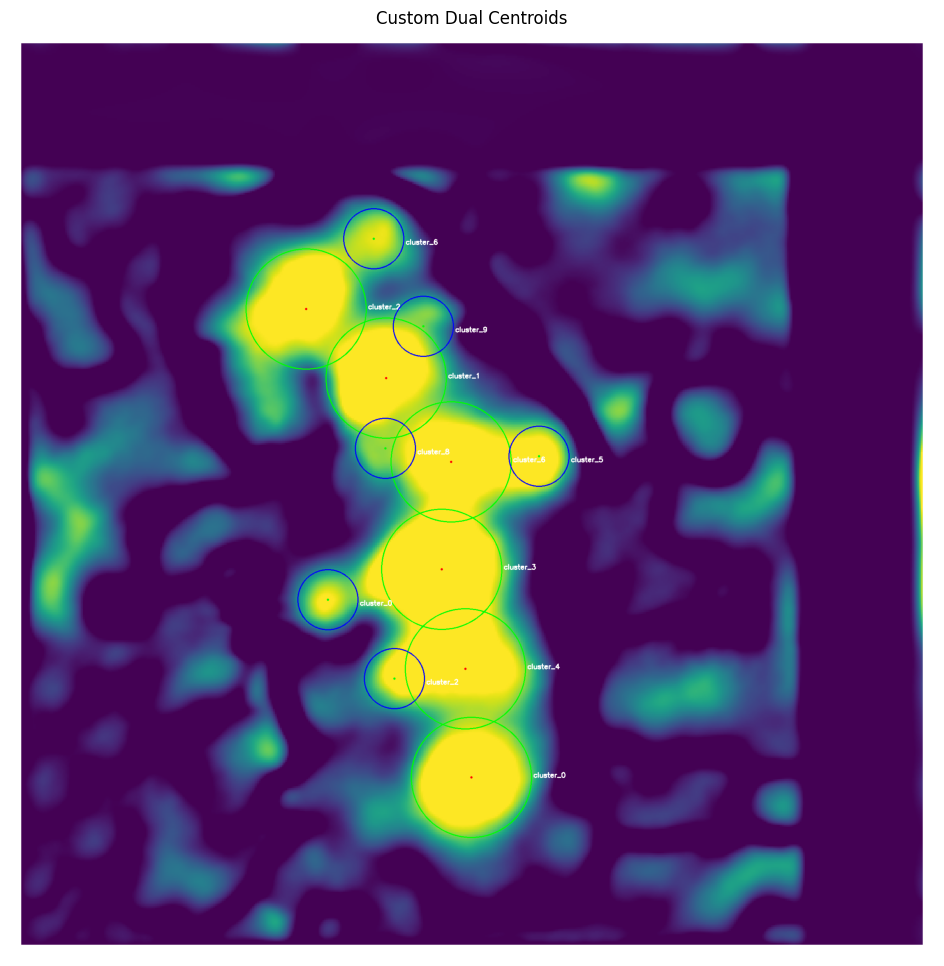

In [33]:
img_dual = visualize_dual_cluster_centroids(
    image, 
    cluster_info,        # First dictionary
    mini_cluster_info,   # Second dictionary
    radius1=160,         # Radius for first dict
    radius2=80,          # Radius for second dict
    color1=(0, 255, 0),  # Green for first dict
    color2=(255, 0, 0),  # Blue for second dict
    thickness=2
)

plt.figure(figsize=(15, 12))
plt.imshow(cv.cvtColor(img_dual, cv.COLOR_BGR2RGB))
plt.title('Custom Dual Centroids')
plt.axis('off')
plt.show()

: 

: 